In [1]:
# For Data manipulation and Analaysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# For feature selection and hyperparameter tuning
from sklearn.model_selection import  GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
#warnin
import warnings
warnings.filterwarnings("ignore")

# To save the model
import joblib

In [2]:
#import dataset
df=pd.read_csv("Modified_XSS_Attack_Dataset.csv")

In [3]:
df

,App Names,Permissions,API Name,Website Name,IP,Location,Label,Request Type,Response Code,Attack Type,Payload Size (KB)
0,Navaratri Navarang,"REQUEST_INSTALL_PACKAGES,SET_ALARM,SET_WALLPAPER",Not Sensitive,http://www.grellin.ca,123.130.169.7,Jamaica,No,DELETE,400,CSRF,353
1,Chinese Ancient Music,"WRITE_SYNC_SETTINGS,READ_CALENDAR,WRITE_CALEND...",getAuthToken,http://www.turmir.org/,217.17.240.0,Kenya,Yes,DELETE,500,Not an Attack,136
2,Tranquility,"DISABLE_KEYGUARD,EXPAND_STATUS_BAR,GET_PACKAGE...",Not Sensitive,http://www.fircix.com/,156.240.194.38,Somalia,No,GET,401,CSRF,211
3,Medical Image Puzzle,"ANSWER_PHONE_CALLS,READ_CALL_LOG,WRITE_CALL_LO...",getCertificate,http://www.intono.org/,12.176.37.134,Bangladesh,Yes,POST,404,XSS,47
4,EscapeGame N29 - Cave Escape,"ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_NETWORK_...",Not Sensitive,http://www.uratax.com/,185.236.132.0,Nigeria,No,DELETE,200,DDoS,468
...,...,...,...,...,...,...,...,...,...,...,...
19995,Spanisch Deutsch Wörterbuch,"ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_NETWORK_...",Not Sensitive,http://www.ghelio.com/,21.194.38.94,Malawi,No,DELETE,200,CSRF,252
19996,ShotSynth,"RECEIVE_BOOT_COMPLETED,REORDER_TASKS,REQUEST_C...",getParams,http://www.adoorig.ca,47.137.2.183,Egypt,Yes,GET,403,XSS,76
19997,ArmAware,"REQUEST_INSTALL_PACKAGES,SET_ALARM,SET_WALLPAPER",getAuthToken,http://www.mapeem.org/,188.16.254.33,Djibouti,Yes,PUT,404,DDoS,481
19998,Switcher Game,"KILL_BACKGROUND_PROCESSES,MANAGE_OWN_CALLS,MOD...",sendMultipartTextMessage,http://www.pacuppral.net/,43.231.24.0,Fiji,Yes,GET,301,Not an Attack,448


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   App Names          20000 non-null  object
 1   Permissions        20000 non-null  object
 2   API Name           20000 non-null  object
 3   Website Name       20000 non-null  object
 4   IP                 20000 non-null  object
 5   Location           19800 non-null  object
 6   Label              20000 non-null  object
 7   Request Type       20000 non-null  object
 8   Response Code      20000 non-null  int64 
 9   Attack Type        20000 non-null  object
 10  Payload Size (KB)  20000 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 1.7+ MB


In [5]:
#check columns and rows
df.shape

(20000, 11)

In [6]:
df.describe()

,Response Code,Payload Size (KB)
count,20000.000000,20000.000000
mean,372.680600,250.009350
std,88.788157,143.267824
min,200.000000,1.000000
25%,301.000000,126.000000
50%,401.000000,250.000000
75%,404.000000,374.000000
max,500.000000,499.000000


In [7]:
df.head()

,App Names,Permissions,API Name,Website Name,IP,Location,Label,Request Type,Response Code,Attack Type,Payload Size (KB)
0,Navaratri Navarang,"REQUEST_INSTALL_PACKAGES,SET_ALARM,SET_WALLPAPER",Not Sensitive,http://www.grellin.ca,123.130.169.7,Jamaica,No,DELETE,400,CSRF,353
1,Chinese Ancient Music,"WRITE_SYNC_SETTINGS,READ_CALENDAR,WRITE_CALEND...",getAuthToken,http://www.turmir.org/,217.17.240.0,Kenya,Yes,DELETE,500,Not an Attack,136
2,Tranquility,"DISABLE_KEYGUARD,EXPAND_STATUS_BAR,GET_PACKAGE...",Not Sensitive,http://www.fircix.com/,156.240.194.38,Somalia,No,GET,401,CSRF,211
3,Medical Image Puzzle,"ANSWER_PHONE_CALLS,READ_CALL_LOG,WRITE_CALL_LO...",getCertificate,http://www.intono.org/,12.176.37.134,Bangladesh,Yes,POST,404,XSS,47
4,EscapeGame N29 - Cave Escape,"ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_NETWORK_...",Not Sensitive,http://www.uratax.com/,185.236.132.0,Nigeria,No,DELETE,200,DDoS,468


In [8]:
df=df.drop(columns=["IP","Payload Size (KB)"])


In [9]:
df

,App Names,Permissions,API Name,Website Name,Location,Label,Request Type,Response Code,Attack Type
0,Navaratri Navarang,"REQUEST_INSTALL_PACKAGES,SET_ALARM,SET_WALLPAPER",Not Sensitive,http://www.grellin.ca,Jamaica,No,DELETE,400,CSRF
1,Chinese Ancient Music,"WRITE_SYNC_SETTINGS,READ_CALENDAR,WRITE_CALEND...",getAuthToken,http://www.turmir.org/,Kenya,Yes,DELETE,500,Not an Attack
2,Tranquility,"DISABLE_KEYGUARD,EXPAND_STATUS_BAR,GET_PACKAGE...",Not Sensitive,http://www.fircix.com/,Somalia,No,GET,401,CSRF
3,Medical Image Puzzle,"ANSWER_PHONE_CALLS,READ_CALL_LOG,WRITE_CALL_LO...",getCertificate,http://www.intono.org/,Bangladesh,Yes,POST,404,XSS
4,EscapeGame N29 - Cave Escape,"ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_NETWORK_...",Not Sensitive,http://www.uratax.com/,Nigeria,No,DELETE,200,DDoS
...,...,...,...,...,...,...,...,...,...
19995,Spanisch Deutsch Wörterbuch,"ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_NETWORK_...",Not Sensitive,http://www.ghelio.com/,Malawi,No,DELETE,200,CSRF
19996,ShotSynth,"RECEIVE_BOOT_COMPLETED,REORDER_TASKS,REQUEST_C...",getParams,http://www.adoorig.ca,Egypt,Yes,GET,403,XSS
19997,ArmAware,"REQUEST_INSTALL_PACKAGES,SET_ALARM,SET_WALLPAPER",getAuthToken,http://www.mapeem.org/,Djibouti,Yes,PUT,404,DDoS
19998,Switcher Game,"KILL_BACKGROUND_PROCESSES,MANAGE_OWN_CALLS,MOD...",sendMultipartTextMessage,http://www.pacuppral.net/,Fiji,Yes,GET,301,Not an Attack


In [10]:

count=df['Label'].value_counts()
count

Label
Yes    10068
No      9932
Name: count, dtype: int64

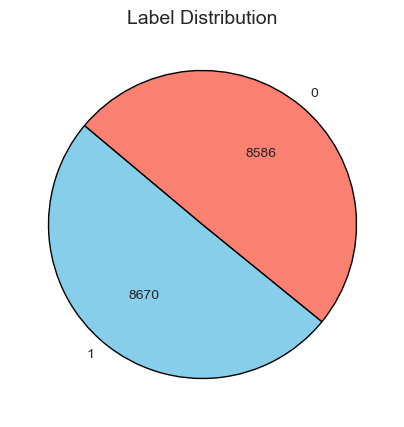

In [71]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
count = df["Label"].value_counts()

# Create pie chart
plt.figure(figsize=(5,5))
plt.pie(count, labels=count.index, autopct=lambda p: f'{int(p * sum(count) / 100)}',  
        colors=["skyblue", "salmon", "lightgreen", "gold"], startangle=140, wedgeprops={'edgecolor': 'black'})

# Title
plt.title("Label Distribution", fontsize=14)

# Show plot
plt.show()


In [12]:
df['Attack Type'].value_counts()


Attack Type
Not an Attack    4108
DDoS             4053
XSS              3957
SQL Injection    3949
CSRF             3933
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

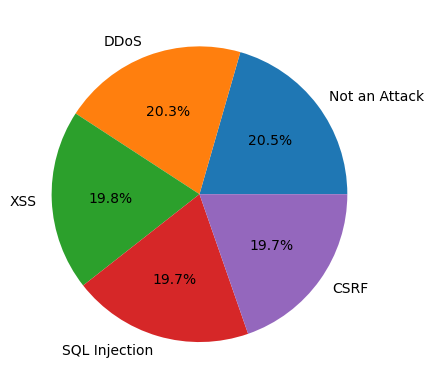

In [13]:
plt.pie(df["Attack Type"].value_counts(),labels=df["Attack Type"].value_counts().index,autopct="%1.1f%%")
plt.show

In [14]:
#most attacked location
df.groupby("Location")["Attack Type"].count().sort_values(ascending=False)


Location
United States          1302
USA - Florida           643
Azerbaijan              585
Brazil                  236
Japan                   207
                       ... 
Kyrgyz                   39
Kyrgyz                   36
Switzerland              36
Turks                    35
Virgin Islands (UK)      34
Name: Attack Type, Length: 163, dtype: int64

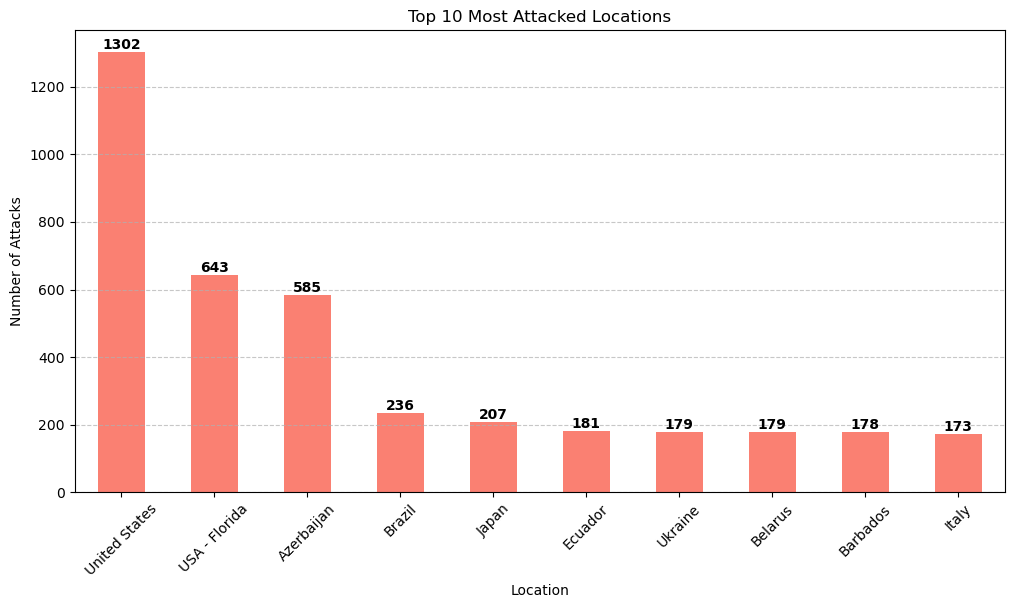

In [15]:
import matplotlib.pyplot as plt

# Get top 10 most attacked locations
top_locations = df.groupby("Location")["Attack Type"].count().sort_values(ascending=False).head(10)

# Create figure
plt.figure(figsize=(12,6))
ax = top_locations.plot(kind="bar", color="salmon")

# Labels and title
plt.xlabel("Location")
plt.ylabel("Number of Attacks")
plt.title("Top 10 Most Attacked Locations")
plt.xticks(rotation=45)  
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add value labels on top of bars
for bar in ax.patches:
    ax.annotate(f"{bar.get_height()}",  
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.show()


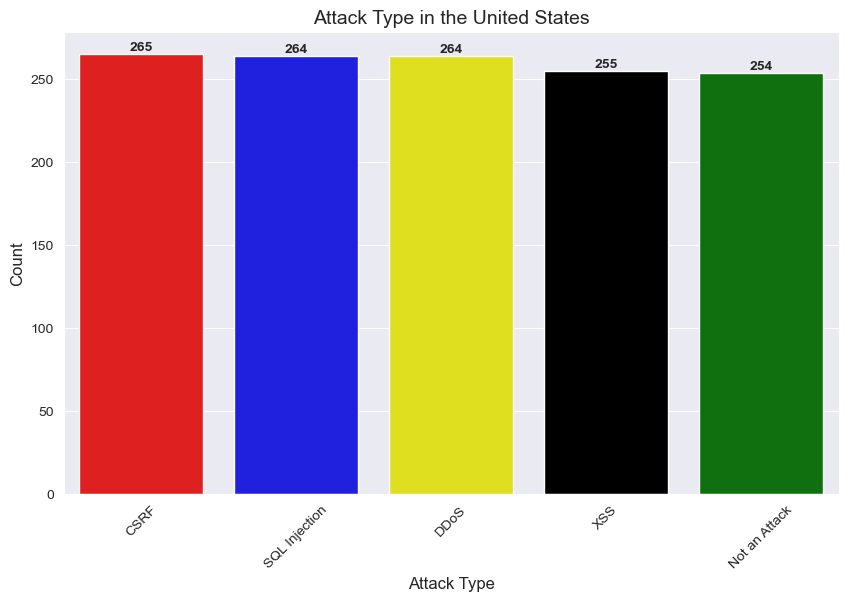

In [16]:
# Filter for attacks in the United States
us_attacks = df[df["Location"] == "United States"]

# Count attacks by attack type
attack_counts = us_attacks["Attack Type"].value_counts()

# Set figure size
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

# Create bar plot
ax = sns.barplot(x=attack_counts.index, y=attack_counts.values, palette=["red","blue","yellow","black","green"])

# Add value labels on top of bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', label_type="edge", fontsize=10, fontweight="bold")

# Labels and title
plt.title("Attack Type in the United States", fontsize=14)
plt.xlabel("Attack Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability

# Show plot
plt.show()

In [17]:
df.dtypes

App Names        object
Permissions      object
API Name         object
Website Name     object
Location         object
Label            object
Request Type     object
Response Code     int64
Attack Type      object
dtype: object

In [18]:
df.duplicated().sum()

2744

In [19]:
df=df.drop_duplicates()

In [20]:
df.duplicated().sum()

0

outlayer

In [21]:
num_cols = df.select_dtypes(include="number").columns

In [22]:
num_cols

Index(['Response Code'], dtype='object')

<Axes: ylabel='Response Code'>

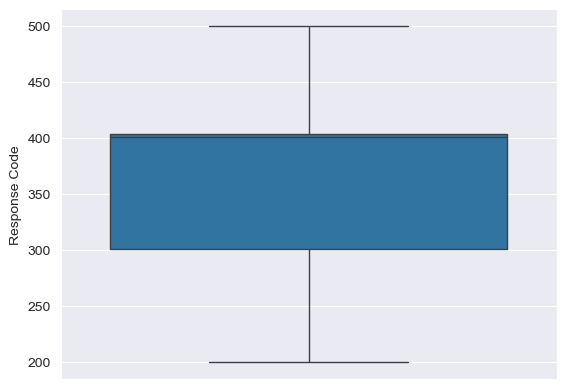

In [23]:
sns.boxplot(df["Response Code"])



In [24]:

#check Null
df.isnull().sum()

App Names          0
Permissions        0
API Name           0
Website Name       0
Location         200
Label              0
Request Type       0
Response Code      0
Attack Type        0
dtype: int64

In [25]:
df["Location"]=df["Location"].fillna(method="ffill")

In [26]:
df.isnull().sum()

App Names        0
Permissions      0
API Name         0
Website Name     0
Location         0
Label            0
Request Type     0
Response Code    0
Attack Type      0
dtype: int64

In [27]:
df["Location"]=df["Location"].fillna(method="ffill")

In [28]:
df["Attack Type"]=df["Attack Type"].fillna(method="ffill")

In [29]:
df.isnull().sum()

App Names        0
Permissions      0
API Name         0
Website Name     0
Location         0
Label            0
Request Type     0
Response Code    0
Attack Type      0
dtype: int64

In [30]:
df

,App Names,Permissions,API Name,Website Name,Location,Label,Request Type,Response Code,Attack Type
0,Navaratri Navarang,"REQUEST_INSTALL_PACKAGES,SET_ALARM,SET_WALLPAPER",Not Sensitive,http://www.grellin.ca,Jamaica,No,DELETE,400,CSRF
1,Chinese Ancient Music,"WRITE_SYNC_SETTINGS,READ_CALENDAR,WRITE_CALEND...",getAuthToken,http://www.turmir.org/,Kenya,Yes,DELETE,500,Not an Attack
2,Tranquility,"DISABLE_KEYGUARD,EXPAND_STATUS_BAR,GET_PACKAGE...",Not Sensitive,http://www.fircix.com/,Somalia,No,GET,401,CSRF
3,Medical Image Puzzle,"ANSWER_PHONE_CALLS,READ_CALL_LOG,WRITE_CALL_LO...",getCertificate,http://www.intono.org/,Bangladesh,Yes,POST,404,XSS
4,EscapeGame N29 - Cave Escape,"ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_NETWORK_...",Not Sensitive,http://www.uratax.com/,Nigeria,No,DELETE,200,DDoS
...,...,...,...,...,...,...,...,...,...
19994,Eureka! Quiz Game,"ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_NETWORK_...",Not Sensitive,http://www.ceitalt.ca,United States,No,PUT,200,SQL Injection
19995,Spanisch Deutsch Wörterbuch,"ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_NETWORK_...",Not Sensitive,http://www.ghelio.com/,Malawi,No,DELETE,200,CSRF
19996,ShotSynth,"RECEIVE_BOOT_COMPLETED,REORDER_TASKS,REQUEST_C...",getParams,http://www.adoorig.ca,Egypt,Yes,GET,403,XSS
19998,Switcher Game,"KILL_BACKGROUND_PROCESSES,MANAGE_OWN_CALLS,MOD...",sendMultipartTextMessage,http://www.pacuppral.net/,Fiji,Yes,GET,301,Not an Attack


In [31]:
df.columns

Index(['App Names', 'Permissions', 'API Name', 'Website Name', 'Location',
       'Label', 'Request Type', 'Response Code', 'Attack Type'],
      dtype='object')

**LABELENCODING**

In [32]:
df

,App Names,Permissions,API Name,Website Name,Location,Label,Request Type,Response Code,Attack Type
0,Navaratri Navarang,"REQUEST_INSTALL_PACKAGES,SET_ALARM,SET_WALLPAPER",Not Sensitive,http://www.grellin.ca,Jamaica,No,DELETE,400,CSRF
1,Chinese Ancient Music,"WRITE_SYNC_SETTINGS,READ_CALENDAR,WRITE_CALEND...",getAuthToken,http://www.turmir.org/,Kenya,Yes,DELETE,500,Not an Attack
2,Tranquility,"DISABLE_KEYGUARD,EXPAND_STATUS_BAR,GET_PACKAGE...",Not Sensitive,http://www.fircix.com/,Somalia,No,GET,401,CSRF
3,Medical Image Puzzle,"ANSWER_PHONE_CALLS,READ_CALL_LOG,WRITE_CALL_LO...",getCertificate,http://www.intono.org/,Bangladesh,Yes,POST,404,XSS
4,EscapeGame N29 - Cave Escape,"ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_NETWORK_...",Not Sensitive,http://www.uratax.com/,Nigeria,No,DELETE,200,DDoS
...,...,...,...,...,...,...,...,...,...
19994,Eureka! Quiz Game,"ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_NETWORK_...",Not Sensitive,http://www.ceitalt.ca,United States,No,PUT,200,SQL Injection
19995,Spanisch Deutsch Wörterbuch,"ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_NETWORK_...",Not Sensitive,http://www.ghelio.com/,Malawi,No,DELETE,200,CSRF
19996,ShotSynth,"RECEIVE_BOOT_COMPLETED,REORDER_TASKS,REQUEST_C...",getParams,http://www.adoorig.ca,Egypt,Yes,GET,403,XSS
19998,Switcher Game,"KILL_BACKGROUND_PROCESSES,MANAGE_OWN_CALLS,MOD...",sendMultipartTextMessage,http://www.pacuppral.net/,Fiji,Yes,GET,301,Not an Attack


In [33]:
from sklearn.preprocessing import LabelEncoder


In [34]:
le=LabelEncoder()

In [35]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()
le8=LabelEncoder()
le9=LabelEncoder()

In [37]:
df['App Names']=le1.fit_transform(df['App Names'])
df['Permissions']=le2.fit_transform(df['Permissions'])
df['API Name']=le3.fit_transform(df['API Name'])
df['Website Name']=le4.fit_transform(df['Website Name'])
df['Location']=le5.fit_transform(df['Location'])
df['Label']=le6.fit_transform(df['Label'])
df['Request Type']=le7.fit_transform(df['Request Type'])
df['Response Code']=le8.fit_transform(df['Response Code'])
df['Attack Type']=le9.fit_transform(df['Attack Type'])

In [38]:
df

,App Names,Permissions,API Name,Website Name,Location,Label,Request Type,Response Code,Attack Type
0,287,22,2,153,87,0,0,2,0
1,103,25,12,375,91,1,0,6,2
2,408,7,2,117,126,0,1,3,0
3,264,4,15,187,16,1,2,5,4
4,138,3,2,383,122,0,0,0,1
...,...,...,...,...,...,...,...,...,...
19994,140,2,2,54,152,0,3,0,3
19995,376,2,2,134,108,0,0,0,0
19996,370,20,22,9,54,1,1,4,4
19998,389,17,36,287,60,1,1,1,2


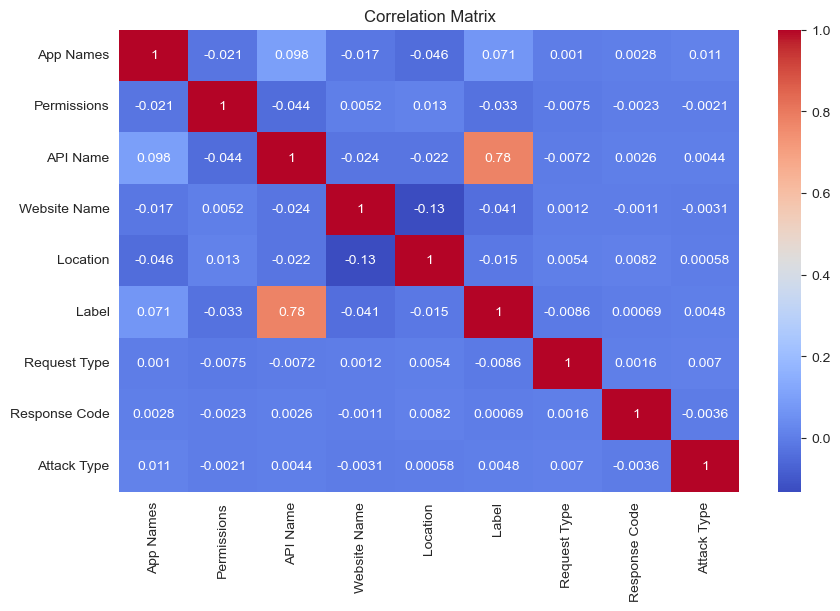

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [40]:
X=df.drop('Label',axis=1)
y=df['Label']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=10)

In [43]:
#Standardized the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.tree import DecisionTreeClassifier


In [45]:
model=DecisionTreeClassifier()

In [46]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
model.score(X_train,y_train)

1.0

In [48]:
model.score(X_test,y_test)

1.0

In [49]:
model=RandomForestClassifier()

In [50]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
model.score(X_test,y_test)

1.0

In [52]:
model.score(X_train,y_train)

1.0

In [53]:
model=LogisticRegression()

In [54]:
model.fit(X_train,y_train)

LogisticRegression()

In [55]:
model.score(X_test,y_test)

0.9803012746234068

In [56]:
model.score(X_train,y_train)

0.9779781068898905

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
models =[ DecisionTreeClassifier(),LogisticRegression(),RandomForestClassifier(),XGBClassifier(),GaussianNB(),]

In [59]:
def compare_models():
  for model in models:
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Accuracy score of" , model ,"is: ", accuracy)

In [60]:
compare_models()

Accuracy score of DecisionTreeClassifier() is:  1.0
Accuracy score of LogisticRegression() is:  0.9803012746234068
Accuracy score of RandomForestClassifier() is:  1.0
Accuracy score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) is:  1.0
Accuracy score of GaussianNB() is:  1.0


In [61]:
#logistic tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid_lr, scoring='accuracy', cv=5, verbose=1, n_jobs=-1
)

# Fit and evaluate
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

# Predictions
y_train_pred_lr = best_lr.predict(X_train)
y_test_pred_lr = best_lr.predict(X_test)

# Metrics
print("Logistic Regression Results:")
print("Best Parameters:", grid_search_lr.best_params_)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_test_pred_lr))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Logistic Regression Results:
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Train Accuracy: 0.9858338699291693
Test Accuracy: 0.9884125144843569
Confusion Matrix:
 [[887   0]
 [ 20 819]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       887
           1       1.00      0.98      0.99       839

    accuracy                           0.99      1726
   macro avg       0.99      0.99      0.99      1726
weighted avg       0.99      0.99      0.99      1726



In [62]:


model_params = {
    'logistic_regression': {'model': LogisticRegression(), 'params': {'C': [1, 5, 10]}},
    'random_forest': {'model': RandomForestClassifier(), 'params': {'n_estimators': [1, 2, 10]}},
    'decision_tree': {'model': DecisionTreeClassifier(), 'params': {'max_depth': [1, 5, 10]}},
    'knn': {'model': KNeighborsClassifier(), 'params': {'n_neighbors': [1, 5, 10]}},
    'XGB': {'model': XGBClassifier(), 'params': {'alpha': [0.4]}},
    'naive_bayes': {'model': GaussianNB(), 'params': {'var_smoothing': [1e-9, 1e-8, 1e-7]}}
}

scores = []
models=['logistic_regression','random_forest','decision_tree','knn','XGB','naive_bayes']

for model_name in models:
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(X_train,y_train)
    scores.append({'model':model_name,'best_score':gds.best_score_,'best_params':gds.best_params_})
    best_model = gds.best_estimator_
    #evaluate on test set
    y_pred = best_model.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred)
    

In [63]:
scores

[{'model': 'logistic_regression',
  'best_score': 0.983451384417257,
  'best_params': {'C': 10}},
 {'model': 'random_forest',
  'best_score': 1.0,
  'best_params': {'n_estimators': 10}},
 {'model': 'decision_tree',
  'best_score': 1.0,
  'best_params': {'max_depth': 5}},
 {'model': 'knn',
  'best_score': 0.928718609143593,
  'best_params': {'n_neighbors': 5}},
 {'model': 'XGB', 'best_score': 1.0, 'best_params': {'alpha': 0.4}},
 {'model': 'naive_bayes',
  'best_score': 1.0,
  'best_params': {'var_smoothing': 1e-09}}]

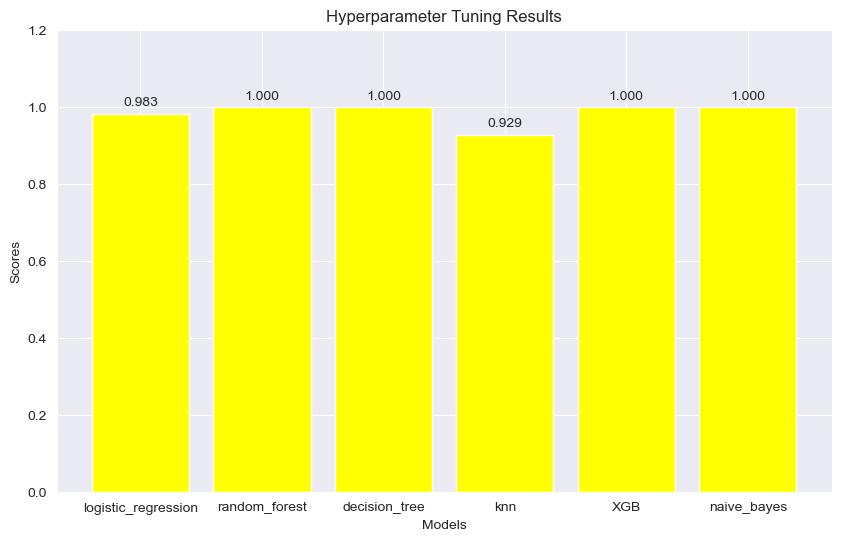

In [64]:
model=[score['model'] for score in scores]
scor=[score['best_score'] for score in scores]
plt.figure(figsize=(10, 6))
plt.bar(model,scor,color='yellow')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Hyperparameter Tuning Results')
plt.ylim(0, 1.2)

for i, score in enumerate(scor):
    plt.text(i,score + 0.02 , f'{score:.3f}', ha='center')

plt.show()

In [65]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       1.00      1.00      1.00       839

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726



In [66]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[887   0]
 [  0 839]]


In [67]:
classification_rep= classification_report(y_test,y_pred)
conf_matrix= confusion_matrix(y_test,y_pred)

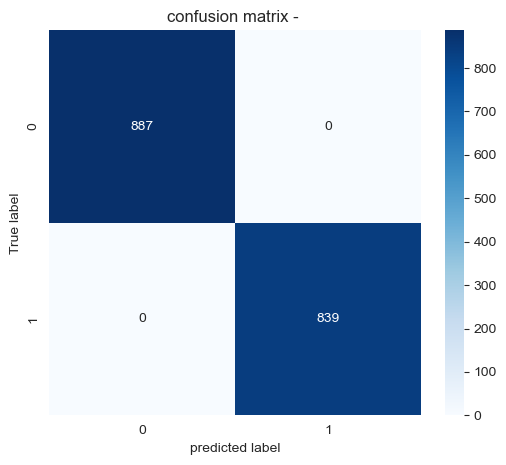

In [68]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d" , cmap="Blues")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.title("confusion matrix - ")
plt.show()

In [69]:
joblib.dump(best_lr,r"C:\Users\YAHFAN\OneDrive\Desktop\yahfan17\project.pkl")

['C:\\Users\\YAHFAN\\OneDrive\\Desktop\\yahfan17\\project.pkl']

In [70]:
joblib.dump(le1,r"C:\Users\YAHFAN\OneDrive\Desktop\yahfan17\le1.pkl")
joblib.dump(le2,r"C:\Users\YAHFAN\OneDrive\Desktop\yahfan17\le2.pkl")
joblib.dump(le3,r"C:\Users\YAHFAN\OneDrive\Desktop\yahfan17\le3.pkl")
joblib.dump(le4,r"C:\Users\YAHFAN\OneDrive\Desktop\yahfan17\le4.pkl")
joblib.dump(le5,r"C:\Users\YAHFAN\OneDrive\Desktop\yahfan17\le5.pkl")
joblib.dump(le6,r"C:\Users\YAHFAN\OneDrive\Desktop\yahfan17\le6.pkl")
joblib.dump(le7,r"C:\Users\YAHFAN\OneDrive\Desktop\yahfan17\le7.pkl")
joblib.dump(le8,r"C:\Users\YAHFAN\OneDrive\Desktop\yahfan17\le8.pkl")
joblib.dump(le9,r"C:\Users\YAHFAN\OneDrive\Desktop\yahfan17\le9.pkl")
joblib.dump(scaler,r"C:\Users\YAHFAN\OneDrive\Desktop\yahfan17\scaler.pkl")

['C:\\Users\\YAHFAN\\OneDrive\\Desktop\\yahfan17\\scaler.pkl']